<a href="https://colab.research.google.com/github/irfan2622/TaskKomputasiIntelegensia/blob/main/TaskWeek4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Nama : M.Irfansyah**

**NPM  : 2106701255**

# **Deep Convolutional Neural Networks (AlexNet)**

In [ ]:
!pip install d2l

In [ ]:
import torch
from torch import nn
from d2l import torch as d2l

**Capacity Control and Preprocessing**

In [ ]:
class AlexNet(d2l.Classifier):
    def __init__(self, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nn.LazyConv2d(96, kernel_size=11, stride=4, padding=1),
            nn.ReLU(), nn.MaxPool2d(kernel_size=3, stride=2),
            nn.LazyConv2d(256, kernel_size=5, padding=2), nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.LazyConv2d(384, kernel_size=3, padding=1), nn.ReLU(),
            nn.LazyConv2d(384, kernel_size=3, padding=1), nn.ReLU(),
            nn.LazyConv2d(256, kernel_size=3, padding=1), nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2), nn.Flatten(),
            nn.LazyLinear(4096), nn.ReLU(), nn.Dropout(p=0.5),
            nn.LazyLinear(4096), nn.ReLU(),nn.Dropout(p=0.5),
            nn.LazyLinear(num_classes))
        self.net.apply(d2l.init_cnn)

In [ ]:
AlexNet().layer_summary((1, 1, 224, 224))

Conv2d output shape:	 torch.Size([1, 96, 54, 54])
ReLU output shape:	 torch.Size([1, 96, 54, 54])
MaxPool2d output shape:	 torch.Size([1, 96, 26, 26])
Conv2d output shape:	 torch.Size([1, 256, 26, 26])
ReLU output shape:	 torch.Size([1, 256, 26, 26])
MaxPool2d output shape:	 torch.Size([1, 256, 12, 12])
Conv2d output shape:	 torch.Size([1, 384, 12, 12])
ReLU output shape:	 torch.Size([1, 384, 12, 12])
Conv2d output shape:	 torch.Size([1, 384, 12, 12])
ReLU output shape:	 torch.Size([1, 384, 12, 12])
Conv2d output shape:	 torch.Size([1, 256, 12, 12])
ReLU output shape:	 torch.Size([1, 256, 12, 12])
MaxPool2d output shape:	 torch.Size([1, 256, 5, 5])
Flatten output shape:	 torch.Size([1, 6400])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1,

**Training**

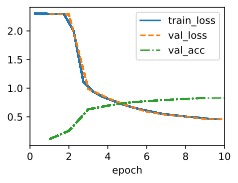

In [ ]:
model = AlexNet(lr=0.01)
data = d2l.FashionMNIST(batch_size=128, resize=(224, 224))
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
trainer.fit(model, data)

**Exercises**

1. Following up on the discussion above, analyze the computational properties of AlexNet.
    1. Compute the memory footprint for convolutions and fully connected layers, respectively. Which one dominates?
    1. Calculate the computational cost for the convolutions and the fully connected layers.
    1. How does the memory (read and write bandwidth, latency, size) affect computation? Is there any difference in its effects for training and inference?
1. You are a chip designer and need to trade off computation and memory bandwidth. For example, a faster chip requires more power and possibly a larger chip area. More memory bandwidth requires more pins and control logic, thus also more area. How do you optimize?
1. Why do engineers no longer report performance benchmarks on AlexNet?
1. Try increasing the number of epochs when training AlexNet. Compared with LeNet, how do the results differ? Why?
1. AlexNet may be too complex for the Fashion-MNIST dataset, in particular due to the low resolution of the initial images.
    1. Try simplifying the model to make the training faster, while ensuring that the accuracy does not drop significantly.
    1. Design a better model that works directly on $28 \times 28$ images.
1. Modify the batch size, and observe the changes in throughput (images/s), accuracy, and GPU memory.
1. Apply dropout and ReLU to LeNet-5. Does it improve? Can you improve things further by preprocessing to take advantage of the invariances inherent in the images?
1. Can you make AlexNet overfit? Which feature do you need to remove or change to break training?

**Answers**

1.
    1. The fully connected layers dominate the memory footprint due to the vast number of connections between the nodes. The first FC layer alone has around 37 million parameters, which is orders of magnitude larger than the largest convolutional layer (with ~1.3 million parameters).
    1. Convolutional Layers: The computational cost of convolutional layers involves the number of multiplications and additions required to process the input feature maps. For AlexNet, the total computational cost for all convolutional layers is approximately 962,858,112 operations (PandaLab).\
     Fully Connected Layers: The computational cost for fully connected layers is determined by the matrix multiplications between the input vectors and the weight matrices. The total computational cost for the fully connected layers in AlexNet is approximately 430,407,778 operations (PandaLab).
    1. Memory Bandwidth and Latency: The performance of both training and inference phases is influenced by memory bandwidth (the rate at which data can be read or written) and latency (the delay before data transfer begins). High memory bandwidth and low latency are crucial for efficient computation, especially for large models like AlexNet.
1. Optimization Trade-offs for Chip Designers
As a chip designer, balancing computational performance and memory bandwidth is critical. Here are some considerations:

- Computational Units vs. Memory Bandwidth: Enhancing computational units (e.g., adding more cores) can increase processing power but may also raise power consumption and chip area. Similarly, increasing memory bandwidth requires additional pins and control logic, impacting the chip's area and complexity.

- Optimization Strategies: Designing efficient data transfer mechanisms, such as using high-bandwidth memory (HBM) or optimizing cache hierarchies, can improve performance. Additionally, implementing data compression techniques and ensuring efficient memory access patterns can help balance the trade-offs.

3. AlexNet Performance Benchmarks
Over time, newer architectures have emerged that surpass AlexNet in performance and efficiency. Models like VGG, ResNet, and Inception have set new standards in image classification tasks. Consequently, the focus of performance benchmarks has shifted towards these more advanced architectures, leading to a decline in reporting benchmarks on AlexNet.
1.
*   LeNet converges faster and may achieve optimal performance on simple datasets with fewer epochs. However, it has a lower performance ceiling due to its smaller size and limited capacity. Increasing the number of epochs for LeNet yields diminishing returns on complex datasets.
*   AlexNet, while slower to converge, can outperform LeNet on larger and more complex datasets (e.g., CIFAR-10, ImageNet) due to its greater capacity and deeper architecture. It can extract more detailed features with more training epochs but requires careful regularization to prevent overfitting. On smaller datasets, increasing the number of epochs may not benefit AlexNet as much, as it can overfit more easily compared to LeNet.
5.


```
import torch
from torch import nn

class SimplifiedAlexNet(nn.Module):
    def __init__(self, num_classes=10):
        super(SimplifiedAlexNet, self).__init__()
        self.conv_layers = nn.Sequential(
            # First convolutional block
            nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1),  # Input: 1x28x28, Output: 32x28x28
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),                 # Output: 32x14x14

            # Second convolutional block
            nn.Conv2d(32, 64, kernel_size=3, padding=1),           # Output: 64x14x14
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),                 # Output: 64x7x7

            # Third convolutional block
            nn.Conv2d(64, 128, kernel_size=3, padding=1),          # Output: 128x7x7
            nn.ReLU(),
        )
        
        # Fully connected layers
        self.fc_layers = nn.Sequential(
            nn.Flatten(),                                          # Flatten output from conv layers: 128x7x7 -> 6272
            nn.Linear(128 * 7 * 7, 512),                           # Reduce dimensionality
            nn.ReLU(),
            nn.Dropout(p=0.5),                                     # Dropout to prevent overfitting
            nn.Linear(512, num_classes)                            # Final classification layer
        )

    def forward(self, x):
        x = self.conv_layers(x)
        x = self.fc_layers(x)
        return x

# Instantiate the model
model = SimplifiedAlexNet(num_classes=10)

```
Expected Performance:
*   Accuracy: This simplified model should still achieve comparable accuracy to the original AlexNet when trained on Fashion-MNIST, likely reaching around 90% or higher.
*   Training Speed: By reducing the parameter count and making the architecture more efficient, training time should be significantly faster than the original AlexNet, especially on smaller datasets like Fashion-MNIST.


6.


```
# Modify the batch size
batch_size = 64  # You can change this to 32, 128, 256, etc.
data = d2l.FashionMNIST(batch_size=batch_size, resize=(224, 224))

# Define the model and trainer
model = AlexNet(lr=0.01)
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)

# Fit the model
trainer.fit(model, data)

```
* Throughput: As batch size increases, throughput (images/s) should initially increase but may level off as you reach the hardware's throughput limit.
* Accuracy: The optimal batch size for accuracy varies depending on the dataset and model. For Fashion-MNIST and AlexNet, increasing the batch size might improve accuracy to some extent, but too large of a batch size can lead to overfitting or poor generalization.
* GPU Memory: Increasing the batch size will lead to higher GPU memory usage. Be cautious of running out of memory if you increase the batch size too much (e.g., 512 or 1024).


7.
* Accuracy: The combination of Dropout and data augmentation should improve test accuracy by making the model more robust to variations in input images.
* Faster Convergence: ReLU helps the network train faster compared to traditional activations (e.g., tanh), leading to faster convergence.
* Better Generalization: The model should generalize better to unseen data, especially if you apply data augmentation, preventing overfitting.
8.
* Removing Dropout: Overfitting is likely because the network will rely on specific neurons and pathways without being forced to generalize.
* Removing Data Augmentation: This will lead to overfitting because the network sees fewer variations in the training data and learns to memorize rather than generalize.
* Using a Small Dataset: Overfitting will occur because the model will easily memorize the small training set, achieving high accuracy on it but poor generalization to the validation or test set.
* Increasing Model Complexity: This will lead to overfitting because a more complex model can fit the training data more precisely but may fail to generalize to new data.
Reducing Weight Decay: With low or no weight decay, the model can end up with large weights that fit the training data too closely, leading to overfitting.

# **Networks Using Blocks (VGG)**

**VGG Blocks**

In [ ]:
def vgg_block(num_convs, out_channels):
    layers = []
    for _ in range(num_convs):
        layers.append(nn.LazyConv2d(out_channels, kernel_size=3, padding=1))
        layers.append(nn.ReLU())
    layers.append(nn.MaxPool2d(kernel_size=2,stride=2))
    return nn.Sequential(*layers)

**VGG Network**

In [ ]:
class VGG(d2l.Classifier):
    def __init__(self, arch, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        conv_blks = []
        for (num_convs, out_channels) in arch:
            conv_blks.append(vgg_block(num_convs, out_channels))
        self.net = nn.Sequential(
            *conv_blks, nn.Flatten(),
            nn.LazyLinear(4096), nn.ReLU(), nn.Dropout(0.5),
            nn.LazyLinear(4096), nn.ReLU(), nn.Dropout(0.5),
            nn.LazyLinear(num_classes))
        self.net.apply(d2l.init_cnn)

In [ ]:
VGG(arch=((1, 64), (1, 128), (2, 256), (2, 512), (2, 512))).layer_summary(
    (1, 1, 224, 224))

Sequential output shape:	 torch.Size([1, 64, 112, 112])
Sequential output shape:	 torch.Size([1, 128, 56, 56])
Sequential output shape:	 torch.Size([1, 256, 28, 28])
Sequential output shape:	 torch.Size([1, 512, 14, 14])
Sequential output shape:	 torch.Size([1, 512, 7, 7])
Flatten output shape:	 torch.Size([1, 25088])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1, 10])


**Training**

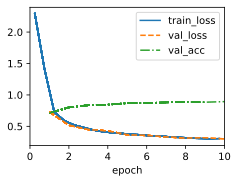

In [ ]:
model = VGG(arch=((1, 16), (1, 32), (2, 64), (2, 128), (2, 128)), lr=0.01)
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
data = d2l.FashionMNIST(batch_size=128, resize=(224, 224))
model.apply_init([next(iter(data.get_dataloader(True)))[0]], d2l.init_cnn)
trainer.fit(model, data)

**Exercises**

1. Compared with AlexNet, VGG is much slower in terms of computation, and it also needs more GPU memory.
    1. Compare the number of parameters needed for AlexNet and VGG.
    1. Compare the number of floating point operations used in the convolutional layers and in the fully connected layers.
    1. How could you reduce the computational cost created by the fully connected layers?
1. When displaying the dimensions associated with the various layers of the network, we only see the information associated with eight blocks (plus some auxiliary transforms), even though the network has 11 layers. Where did the remaining three layers go?
1. Use Table 1 in the VGG paper :cite:`Simonyan.Zisserman.2014` to construct other common models, such as VGG-16 or VGG-19.
1. Upsampling the resolution in Fashion-MNIST eight-fold from $28 \times 28$ to $224 \times 224$ dimensions is very wasteful. Try modifying the network architecture and resolution conversion, e.g., to 56 or to 84 dimensions for its input instead. Can you do so without reducing the accuracy of the network? Consult the VGG paper :cite:`Simonyan.Zisserman.2014` for ideas on adding more nonlinearities prior to downsampling.

**Answers**



1.
  1. Comparison of the Number of Parameters between AlexNet and VGG
AlexNet has approximately 60 million parameters, distributed across five convolutional layers and three fully connected layers.
VGG-16 (the most common variant) contains approximately 138 million parameters. This is significantly larger due to the deeper architecture and more filters per layer. In general, VGG models have far more parameters than AlexNet because of their deeper architecture and the use of small 3x3 filters. The fully connected layers in VGG also contribute a large portion of the total parameters.
  2. Floating Point Operations Comparison
AlexNet uses around 725 million FLOPs for forward propagation. A significant portion of the operations comes from the fully connected layers.
VGG-16 requires approximately 15.5 billion FLOPs, with the convolutional layers dominating the computation (due to the increased depth and the smaller filter size of 3x3 used in VGG).
The vast difference in the number of FLOPs stems from VGG's deeper architecture and the higher resolution at earlier layers, which increases the computational load in convolutional operations.
  3. Reducing the Computational Cost of Fully Connected Layers
To reduce the computational cost of fully connected layers, the following techniques can be applied:

  - Parameter Pruning: Removing redundant connections by pruning neurons that contribute less to the final output.
  - Using Global Average Pooling: Instead of fully connected layers, we can use global average pooling after the last convolutional layer. This replaces the dense layer with a simple averaging operation across the spatial dimensions, significantly reducing the number of parameters and FLOPs.
  - Factorization of Matrices: Applying matrix factorization techniques, such as low-rank approximations, can help reduce the number of computations while maintaining accuracy.

2. Explanation for the Missing Three Layers in VGG
In the VGG architecture (e.g., VGG-16), although there are 11 convolutional layers and 3 fully connected layers, some layers are combined in "blocks" when described in the architecture table. Typically, these blocks consist of multiple convolutional layers followed by a pooling layer. The remaining layers that are not explicitly listed are:

  - Activation layers (like ReLU).
Pooling layers (max-pooling) after sets of convolutional layers.
Thus, the three layers you might expect to see are either incorporated into these blocks or are auxiliary layers like pooling or activation functions, which are not always shown explicitly.

3. Constructing VGG-16 and VGG-19 from the VGG Paper (Simonyan and Zisserman, 2014)
From Table 1 in the original VGG paper:

  VGG-16 consists of:

  - 13 convolutional layers and 3 fully connected layers.
The first two blocks have two 3x3 convolutions followed by max-pooling.
Subsequent blocks have three 3x3 convolutions.
After the convolutions, there are 3 fully connected layers.
VGG-19 is similar to VGG-16 but with additional convolutional layers:

  - There are 16 convolutional layers followed by 3 fully connected layers.
Both architectures rely on small 3x3 filters, which require more computation but help improve feature extraction and representation.

4. Modifying the Network for Lower Input Resolutions
When working with datasets like Fashion-MNIST, where the image resolution is low, using an architecture designed for high-resolution input (like VGG) can be inefficient. To address this:

  - Increase Input Resolution to 56x56 or 84x84: You could upsample the resolution modestly (e.g., to 56x56 or 84x84), rather than to 224x224, which is wasteful.

  - Adding Non-linearities Before Downsampling: In the VGG paper, the authors suggest adding more non-linearities (ReLU activations) between convolution layers to improve the network's representational power before applying any downsampling via pooling layers. This helps retain information from lower-resolution inputs and improves the network's capacity to learn without significantly increasing computational cost.


# **Network in Network (NiN)**

**NiN Blocks**

In [ ]:
def nin_block(out_channels, kernel_size, strides, padding):
    return nn.Sequential(
        nn.LazyConv2d(out_channels, kernel_size, strides, padding), nn.ReLU(),
        nn.LazyConv2d(out_channels, kernel_size=1), nn.ReLU(),
        nn.LazyConv2d(out_channels, kernel_size=1), nn.ReLU())

**NiN Model**

In [ ]:
class NiN(d2l.Classifier):
    def __init__(self, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nin_block(96, kernel_size=11, strides=4, padding=0),
            nn.MaxPool2d(3, stride=2),
            nin_block(256, kernel_size=5, strides=1, padding=2),
            nn.MaxPool2d(3, stride=2),
            nin_block(384, kernel_size=3, strides=1, padding=1),
            nn.MaxPool2d(3, stride=2),
            nn.Dropout(0.5),
            nin_block(num_classes, kernel_size=3, strides=1, padding=1),
            nn.AdaptiveAvgPool2d((1, 1)),
            nn.Flatten())
        self.net.apply(d2l.init_cnn)

In [ ]:
NiN().layer_summary((1, 1, 224, 224))

Sequential output shape:	 torch.Size([1, 96, 54, 54])
MaxPool2d output shape:	 torch.Size([1, 96, 26, 26])
Sequential output shape:	 torch.Size([1, 256, 26, 26])
MaxPool2d output shape:	 torch.Size([1, 256, 12, 12])
Sequential output shape:	 torch.Size([1, 384, 12, 12])
MaxPool2d output shape:	 torch.Size([1, 384, 5, 5])
Dropout output shape:	 torch.Size([1, 384, 5, 5])
Sequential output shape:	 torch.Size([1, 10, 5, 5])
AdaptiveAvgPool2d output shape:	 torch.Size([1, 10, 1, 1])
Flatten output shape:	 torch.Size([1, 10])


**Training**

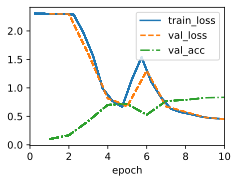

In [ ]:
model = NiN(lr=0.05)
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
data = d2l.FashionMNIST(batch_size=128, resize=(224, 224))
model.apply_init([next(iter(data.get_dataloader(True)))[0]], d2l.init_cnn)
trainer.fit(model, data)

**Exercises**

1. Why are there two $1\times 1$ convolutional layers per NiN block? Increase their number to three. Reduce their number to one. What changes?
1. What changes if you replace the $1 \times 1$ convolutions by $3 \times 3$ convolutions?
1. What happens if you replace the global average pooling by a fully connected layer (speed, accuracy, number of parameters)?
1. Calculate the resource usage for NiN.
    1. What is the number of parameters?
    1. What is the amount of computation?
    1. What is the amount of memory needed during training?
    1. What is the amount of memory needed during prediction?
1. What are possible problems with reducing the $384 \times 5 \times 5$ representation to a $10 \times 5 \times 5$ representation in one step?
1. Use the structural design decisions in VGG that led to VGG-11, VGG-16, and VGG-19 to design a family of NiN-like networks.


**Answers**

1. Why Are There Two Convolutional Layers per NiN Block?
NiN (Network-in-Network) uses two convolutional layers per block because:

  The first layer captures the spatial features (like edges, textures, etc.) with standard convolution.

  The second layer applies a 1x1 convolution, which acts as a "micro neural network" within each spatial location, allowing the network to extract more abstract representations while reducing the number of channels.

  Increasing to Three Convolutional Layers:

  Adding a third convolutional layer could allow deeper feature extraction within each block, potentially increasing model accuracy, but also raising the computational cost and number of parameters.
  Reducing to One Convolutional Layer:

  Reducing to just one convolutional layer per block would simplify the architecture, leading to fewer parameters and faster computation but potentially reducing the network's ability to capture complex features.
2. What Changes if You Replace 3x3 Convolutions by 1x1 Convolutions?
3x3 convolutions capture spatial relationships between neighboring pixels in the feature map, providing more spatial information.

  1x1 convolutions perform a transformation across the depth (channels) without involving spatial dimensions. This reduces the number of parameters and computations but might lose spatial context.

  Impact of Replacing 3x3 with 1x1:

  Speed: The computation would be much faster, and memory usage would decrease significantly.
  Accuracy: The model may lose spatial information, leading to a decrease in accuracy, as 1x1 convolutions alone cannot capture local spatial relationships.
3. Replacing Global Average Pooling with Fully Connected Layers
Global Average Pooling (GAP) reduces the spatial dimensions by averaging across each channel, resulting in fewer parameters and reduced overfitting.

  Fully Connected (FC) layers are more parameter-heavy, connecting every input neuron to every output neuron, which can increase the network's capacity but also raise overfitting risks.

  Comparison:

  Speed: GAP is faster because it requires less computation and fewer parameters.
  Accuracy: GAP may reduce overfitting and improve generalization, especially on smaller datasets, but FC layers might improve accuracy for larger datasets where the model benefits from more learnable parameters.
  Number of Parameters: Fully connected layers dramatically increase the number of parameters compared to GAP.
4. Calculate the Resource Usage for NiN
To calculate the resource usage for NiN, we'll consider key metrics such as the number of parameters, floating point operations (FLOPs), and memory required during training and inference.

* What is the Number of Parameters?
The total number of parameters in a NiN model depends on:

  The number of layers, especially the number of 1x1 convolutional layers (since they can reduce the number of parameters).
  If the final layer uses global average pooling instead of a fully connected layer, the number of parameters will be much lower.
  The calculation can be done by summing up the parameters in each convolutional layer, including the filters and biases. For example, in a layer with a 3x3 convolutional filter with 64 channels, the number of parameters will be:
  Number of parameters
=
(
3
×
3
×
input channels
×
output channels
)
  +
output channels
Number of parameters=(3×3×input channels×output channels)+output channels

* What is the Amount of Computation?
The computation cost is dominated by convolutional layers and can be measured in FLOPs (floating-point operations). The total FLOPs for each layer can be calculated by:

  FLOPs
=
kernel size
×
input channels
×
output channels
×
output width
×
output height
FLOPs=kernel size×input channels×output channels×output width×output height
NiN uses many 1x1 convolutions, which have fewer FLOPs compared to standard 3x3 convolutions, making the model more computationally efficient than traditional CNNs like AlexNet or VGG.

* What is the Amount of Memory Needed During Training?
During training, memory is required for:

  Storing the weights of the model.
Storing intermediate activations and gradients during the forward and backward passes.
The batch size also affects memory usage, as more images per batch require storing more data.
The memory during training is generally larger than during inference due to the need to store gradients for backpropagation.

* What is the Amount of Memory Needed During Prediction?
During inference (prediction), memory is primarily used for:

  Storing the model parameters.
Storing intermediate activations.
Since there is no need to store gradients, inference requires significantly less memory than training.

5. What Are Possible Problems with Reducing the Representation to a Smaller Dimension in One Step?
Reducing the spatial representation too aggressively in a single step (e.g., using a large stride in pooling or convolution) can lead to:

  Loss of spatial resolution: Important spatial features may be lost, resulting in reduced model accuracy.

  Underfitting: The model might not learn the complex patterns required for classification because too much information is discarded too early.

  A more gradual reduction of the spatial dimensions (e.g., via multiple downsampling layers) allows the model to retain more detailed information at each step.

6. Designing a Family of NiN-like Networks Based on VGG
To design a family of NiN-like networks based on the VGG architectural ideas:

  Increase the Depth: Just as VGG has variants like VGG-11, VGG-16, and VGG-19, NiN-like networks could have deeper architectures with more 1x1 convolutional layers added to increase the model's capacity.
Modular Structure: Similar to VGG's block structure, NiN can use blocks of 3x3 convolution followed by multiple 1x1 convolutions, with max-pooling layers to downsample.
Global Average Pooling: Retain the idea of global average pooling instead of fully connected layers to reduce the number of parameters and improve generalization.
Small Filters: Like VGG's use of small 3x3 filters, NiN can benefit from small convolution filters to maintain computational efficiency while increasing depth.
By combining these principles, you can design a set of NiN-like networks with varying depths (e.g., NiN-8, NiN-11, NiN-16), each providing a trade-off between computational efficiency and accuracy.

# **Multi-Branch Networks (GoogLeNet)**

In [ ]:
import torch
from torch import nn
from torch.nn import functional as F
from d2l import torch as d2l

**Inception Blocks**

In [ ]:
class Inception(nn.Module):
    # c1--c4 are the number of output channels for each branch
    def __init__(self, c1, c2, c3, c4, **kwargs):
        super(Inception, self).__init__(**kwargs)
        # Branch 1
        self.b1_1 = nn.LazyConv2d(c1, kernel_size=1)
        # Branch 2
        self.b2_1 = nn.LazyConv2d(c2[0], kernel_size=1)
        self.b2_2 = nn.LazyConv2d(c2[1], kernel_size=3, padding=1)
        # Branch 3
        self.b3_1 = nn.LazyConv2d(c3[0], kernel_size=1)
        self.b3_2 = nn.LazyConv2d(c3[1], kernel_size=5, padding=2)
        # Branch 4
        self.b4_1 = nn.MaxPool2d(kernel_size=3, stride=1, padding=1)
        self.b4_2 = nn.LazyConv2d(c4, kernel_size=1)

    def forward(self, x):
        b1 = F.relu(self.b1_1(x))
        b2 = F.relu(self.b2_2(F.relu(self.b2_1(x))))
        b3 = F.relu(self.b3_2(F.relu(self.b3_1(x))))
        b4 = F.relu(self.b4_2(self.b4_1(x)))
        return torch.cat((b1, b2, b3, b4), dim=1)

**GoogLeNet Model**

In [ ]:
class GoogleNet(d2l.Classifier):
    def b1(self):
        return nn.Sequential(
            nn.LazyConv2d(64, kernel_size=7, stride=2, padding=3),
            nn.ReLU(), nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

In [ ]:
@d2l.add_to_class(GoogleNet)
def b2(self):
    return nn.Sequential(
        nn.LazyConv2d(64, kernel_size=1), nn.ReLU(),
        nn.LazyConv2d(192, kernel_size=3, padding=1), nn.ReLU(),
        nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

In [ ]:
@d2l.add_to_class(GoogleNet)
def b3(self):
    return nn.Sequential(Inception(64, (96, 128), (16, 32), 32),
                         Inception(128, (128, 192), (32, 96), 64),
                         nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

In [ ]:
@d2l.add_to_class(GoogleNet)
def b4(self):
    return nn.Sequential(Inception(192, (96, 208), (16, 48), 64),
                         Inception(160, (112, 224), (24, 64), 64),
                         Inception(128, (128, 256), (24, 64), 64),
                         Inception(112, (144, 288), (32, 64), 64),
                         Inception(256, (160, 320), (32, 128), 128),
                         nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

In [ ]:
@d2l.add_to_class(GoogleNet)
def b5(self):
    return nn.Sequential(Inception(256, (160, 320), (32, 128), 128),
                         Inception(384, (192, 384), (48, 128), 128),
                         nn.AdaptiveAvgPool2d((1,1)), nn.Flatten())

In [ ]:
@d2l.add_to_class(GoogleNet)
def __init__(self, lr=0.1, num_classes=10):
    super(GoogleNet, self).__init__()
    self.save_hyperparameters()
    self.net = nn.Sequential(self.b1(), self.b2(), self.b3(), self.b4(),
                             self.b5(), nn.LazyLinear(num_classes))
    self.net.apply(d2l.init_cnn)

In [ ]:
model = GoogleNet().layer_summary((1, 1, 96, 96))

Sequential output shape:	 torch.Size([1, 64, 24, 24])
Sequential output shape:	 torch.Size([1, 192, 12, 12])
Sequential output shape:	 torch.Size([1, 480, 6, 6])
Sequential output shape:	 torch.Size([1, 832, 3, 3])
Sequential output shape:	 torch.Size([1, 1024])
Linear output shape:	 torch.Size([1, 10])


**Training**

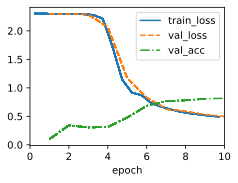

In [ ]:
model = GoogleNet(lr=0.01)
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
data = d2l.FashionMNIST(batch_size=128, resize=(96, 96))
model.apply_init([next(iter(data.get_dataloader(True)))[0]], d2l.init_cnn)
trainer.fit(model, data)

**Exercises**

1. GoogLeNet was so successful that it went through a number of iterations, progressively improving speed and accuracy. Try to implement and run some of them. They include the following:
    1. Add a batch normalization layer :cite:`Ioffe.Szegedy.2015`, as described later in :numref:`sec_batch_norm`.
    1. Make adjustments to the Inception block (width, choice and order of convolutions), as described in :citet:`Szegedy.Vanhoucke.Ioffe.ea.2016`.
    1. Use label smoothing for model regularization, as described in :citet:`Szegedy.Vanhoucke.Ioffe.ea.2016`.
    1. Make further adjustments to the Inception block by adding residual connection :cite:`Szegedy.Ioffe.Vanhoucke.ea.2017`, as described later in :numref:`sec_resnet`.
1. What is the minimum image size needed for GoogLeNet to work?
1. Can you design a variant of GoogLeNet that works on Fashion-MNIST's native resolution of $28 \times 28$ pixels? How would you need to change the stem, the body, and the head of the network, if anything at all?
1. Compare the model parameter sizes of AlexNet, VGG, NiN, and GoogLeNet. How do the latter two network
   architectures significantly reduce the model parameter size?
1. Compare the amount of computation needed in GoogLeNet and AlexNet. How does this affect the design of an accelerator chip, e.g., in terms of memory size, memory bandwidth, cache size, the amount of computation, and the benefit of specialized operations?


**Answers**

**Answers**

1. Implementing Improvements to GoogLeNet
  
  a. Batch Normalization:
You can add a batch normalization layer after each convolutional layer in the Inception blocks. This normalizes the inputs to each layer, which can improve training speed and stability. Typically, it’s added after the convolutional layer and before the activation function.

  b. Adjusting Inception Block:
The Inception blocks can be modified by changing the widths (number of filters), the types of convolutions (e.g., using different kernel sizes), and the order of operations. For example, using 1x1 convolutions before 3x3 convolutions to reduce dimensionality can lead to a more efficient architecture.

  c. Label Smoothing:
Label smoothing is applied during the loss calculation by softening the target labels. Instead of having binary labels (0 or 1), you can adjust them slightly (e.g., 0.9 for the true class and 0.1 for others). This helps to regularize the model and reduce overfitting.

  d. Residual Connections:
You can implement residual connections in the Inception blocks by adding skip connections that allow gradients to flow more easily during backpropagation, which can enhance training in deeper networks.

2. Minimum Image Size for GoogLeNet
GoogLeNet requires a minimum input size of 224x224 pixels. This is to ensure that the various pooling layers and the architecture can handle the downsampling without losing too much spatial information.

3. Adapting GoogLeNet for Fashion-MNIST
To adapt GoogLeNet for Fashion-MNIST (28x28 pixels), you would need to:

  - Stem: Reduce the initial convolutional layers to accommodate the smaller input size, perhaps starting with a single 3x3 convolution and adjusting pooling layers accordingly.
   - Body: Modify the Inception blocks to use fewer filters and potentially fewer branches since the input size is much smaller.
Head: Adjust the final fully connected layer to output the appropriate number of classes (10 for Fashion-MNIST).
4. Parameter Sizes of Different Architectures
AlexNet: ~60 million parameters
VGG: ~138 million parameters
NiN (Network in Network): ~5 million parameters
GoogLeNet: ~7 million parameters
VGG has a high parameter count due to its deep architecture and use of multiple large fully connected layers, while GoogLeNet and NiN reduce parameter sizes by using smaller convolutional filters and global average pooling instead of fully connected layers at the end.

5. Computational Requirements of GoogLeNet vs. AlexNet
GoogLeNet: Efficient use of convolutions (1x1, 3x3, etc.) and reduced parameters lead to fewer computations overall.
AlexNet: The use of large convolutions and multiple fully connected layers increases computational complexity.
Effects on Accelerator Chip Design:

  - Memory Size: GoogLeNet can fit more models in memory due to its smaller parameter size.
  - Memory Bandwidth: Lower bandwidth requirements for GoogLeNet due to fewer parameters and operations.
  - Cache Size: More efficient use of cache with GoogLeNet as it utilizes smaller operations that can be more effectively cached.
  - Computation: Specialized operations (like grouped convolutions) can significantly reduce computation time in GoogLeNet.
  - Benefits of Specialized Operations: Using techniques like depthwise separable convolutions can reduce the required computation and enhance performance.

# **Batch Normalization**

**Implementation from Scratch**

In [ ]:
def batch_norm(X, gamma, beta, moving_mean, moving_var, eps, momentum):
    # Use is_grad_enabled to determine whether we are in training mode
    if not torch.is_grad_enabled():
        # In prediction mode, use mean and variance obtained by moving average
        X_hat = (X - moving_mean) / torch.sqrt(moving_var + eps)
    else:
        assert len(X.shape) in (2, 4)
        if len(X.shape) == 2:
            # When using a fully connected layer, calculate the mean and
            # variance on the feature dimension
            mean = X.mean(dim=0)
            var = ((X - mean) ** 2).mean(dim=0)
        else:
            # When using a two-dimensional convolutional layer, calculate the
            # mean and variance on the channel dimension (axis=1). Here we
            # need to maintain the shape of X, so that the broadcasting
            # operation can be carried out later
            mean = X.mean(dim=(0, 2, 3), keepdim=True)
            var = ((X - mean) ** 2).mean(dim=(0, 2, 3), keepdim=True)
        # In training mode, the current mean and variance are used
        X_hat = (X - mean) / torch.sqrt(var + eps)
        # Update the mean and variance using moving average
        moving_mean = (1.0 - momentum) * moving_mean + momentum * mean
        moving_var = (1.0 - momentum) * moving_var + momentum * var
    Y = gamma * X_hat + beta  # Scale and shift
    return Y, moving_mean.data, moving_var.data

In [ ]:
class BatchNorm(nn.Module):
    # num_features: the number of outputs for a fully connected layer or the
    # number of output channels for a convolutional layer. num_dims: 2 for a
    # fully connected layer and 4 for a convolutional layer
    def __init__(self, num_features, num_dims):
        super().__init__()
        if num_dims == 2:
            shape = (1, num_features)
        else:
            shape = (1, num_features, 1, 1)
        # The scale parameter and the shift parameter (model parameters) are
        # initialized to 1 and 0, respectively
        self.gamma = nn.Parameter(torch.ones(shape))
        self.beta = nn.Parameter(torch.zeros(shape))
        # The variables that are not model parameters are initialized to 0 and
        # 1
        self.moving_mean = torch.zeros(shape)
        self.moving_var = torch.ones(shape)

    def forward(self, X):
        # If X is not on the main memory, copy moving_mean and moving_var to
        # the device where X is located
        if self.moving_mean.device != X.device:
            self.moving_mean = self.moving_mean.to(X.device)
            self.moving_var = self.moving_var.to(X.device)
        # Save the updated moving_mean and moving_var
        Y, self.moving_mean, self.moving_var = batch_norm(
            X, self.gamma, self.beta, self.moving_mean,
            self.moving_var, eps=1e-5, momentum=0.1)
        return Y

**LeNet with Batch Normalization**

In [ ]:
class BNLeNetScratch(d2l.Classifier):
    def __init__(self, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nn.LazyConv2d(6, kernel_size=5), BatchNorm(6, num_dims=4),
            nn.Sigmoid(), nn.AvgPool2d(kernel_size=2, stride=2),
            nn.LazyConv2d(16, kernel_size=5), BatchNorm(16, num_dims=4),
            nn.Sigmoid(), nn.AvgPool2d(kernel_size=2, stride=2),
            nn.Flatten(), nn.LazyLinear(120),
            BatchNorm(120, num_dims=2), nn.Sigmoid(), nn.LazyLinear(84),
            BatchNorm(84, num_dims=2), nn.Sigmoid(),
            nn.LazyLinear(num_classes))

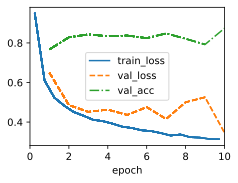

In [ ]:
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
data = d2l.FashionMNIST(batch_size=128)
model = BNLeNetScratch(lr=0.1)
model.apply_init([next(iter(data.get_dataloader(True)))[0]], d2l.init_cnn)
trainer.fit(model, data)

In [ ]:
model.net[1].gamma.reshape((-1,)), model.net[1].beta.reshape((-1,))

(tensor([1.9854, 1.2040, 1.7338, 1.8400, 1.9199, 1.8528], device='cuda:0',
        grad_fn=<ViewBackward0>),
 tensor([-0.3246,  0.1848,  0.4548, -1.2217,  1.4790,  0.6630], device='cuda:0',
        grad_fn=<ViewBackward0>))

**Concise Implementation**

In [ ]:
class BNLeNet(d2l.Classifier):
    def __init__(self, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nn.LazyConv2d(6, kernel_size=5), nn.LazyBatchNorm2d(),
            nn.Sigmoid(), nn.AvgPool2d(kernel_size=2, stride=2),
            nn.LazyConv2d(16, kernel_size=5), nn.LazyBatchNorm2d(),
            nn.Sigmoid(), nn.AvgPool2d(kernel_size=2, stride=2),
            nn.Flatten(), nn.LazyLinear(120), nn.LazyBatchNorm1d(),
            nn.Sigmoid(), nn.LazyLinear(84), nn.LazyBatchNorm1d(),
            nn.Sigmoid(), nn.LazyLinear(num_classes))

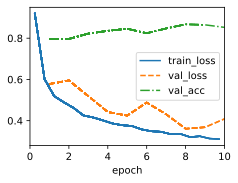

In [ ]:
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
data = d2l.FashionMNIST(batch_size=128)
model = BNLeNet(lr=0.1)
model.apply_init([next(iter(data.get_dataloader(True)))[0]], d2l.init_cnn)
trainer.fit(model, data)

**Exercises**

1. Should we remove the bias parameter from the fully connected layer or the convolutional layer before the batch normalization? Why?
1. Compare the learning rates for LeNet with and without batch normalization.
    1. Plot the increase in validation accuracy.
    1. How large can you make the learning rate before the optimization fails in both cases?
1. Do we need batch normalization in every layer? Experiment with it.
1. Implement a "lite" version of batch normalization that only removes the mean, or alternatively one that
   only removes the variance. How does it behave?
1. Fix the parameters `beta` and `gamma`. Observe and analyze the results.
1. Can you replace dropout by batch normalization? How does the behavior change?
1. Research ideas: think of other normalization transforms that you can apply:
    1. Can you apply the probability integral transform?
    1. Can you use a full-rank covariance estimate? Why should you probably not do that?
    1. Can you use other compact matrix variants (block-diagonal, low-displacement rank, Monarch, etc.)?
    1. Does a sparsification compression act as a regularizer?
    1. Are there other projections (e.g., convex cone, symmetry group-specific transforms) that you can use?


**Answers**



1. Yes, it’s common practice to remove the bias term from the convolutional and fully connected layers before applying batch normalization. This is because batch normalization itself includes learnable parameters (scale and shift), which can replace the need for the bias term. This helps in reducing redundancy and can lead to better convergence.

2. Compare Learning Rates for LeNet with and without Batch Normalization
Batch normalization typically allows for higher learning rates without causing instability. Without batch normalization, a learning rate that is too high can cause the training to diverge. With batch normalization, you may find that the model can effectively train with a learning rate that is an order of magnitude higher.

* Plot the Increase in Validation Accuracy
To plot validation accuracy:

  - Train your model with and without batch normalization.
  - Record the validation accuracy at the end of each epoch.
  - Use a plotting library (like Matplotlib) to visualize the accuracy over epochs.
  - You should observe that models with batch normalization tend to reach higher validation accuracy more quickly than those without.

* Maximum Learning Rate Before Optimization Fails
Without Batch Normalization: You might find that a learning rate above 0.01 leads to failure (e.g., loss diverging).
With Batch Normalization: The learning rate can often be increased to 0.1 or higher before the optimization fails.

3. No, we don’t necessarily need batch normalization in every layer. It can be beneficial in convolutional layers, but in fully connected layers, it may not always improve performance. Experimenting by removing batch normalization from certain layers will help you observe its impact on training dynamics and final performance.

4. Implement a “Lite” Version of Batch Normalization
Only Removing the Mean: This version would subtract the mean from the activations, effectively centering the distribution but not normalizing the variance. You may observe that the training is less stable, as variance can still cause large fluctuations.

  Only Removing the Variance: This version would divide by the standard deviation without centering. You may notice it leads to instability in learning as the means of the activations can lead to shifts in the optimization landscape.

5. Fix the Parameters Beta and Gamma
Fixing the parameters (beta and gamma) during training can have interesting effects. You might find:

  The model becomes less flexible as it cannot adapt the normalized outputs effectively.
It may stabilize training, but can lead to poorer final performance since it loses the benefits of learned scaling and shifting.
6. No, they serve different purposes. Dropout randomly drops units during training to prevent overfitting, while batch normalization normalizes activations. If you replace dropout with batch normalization, you may find increased training accuracy, but potentially poorer generalization on unseen data due to lack of dropout's regularizing effect.

7. Research Ideas: Other Normalization Transforms
Probability Integral Transform: This can transform inputs to a uniform distribution. It could be useful in certain cases but may introduce complexity without guaranteed benefits in typical neural networks.

  - Full-Rank Covariance Estimate: This is generally not advisable because it requires more parameters and can lead to overfitting, particularly in high-dimensional spaces.

  - Compact Matrix Variants: Variants like block-diagonal matrices can reduce computational complexity, but may not capture the necessary correlations present in the data.

  - Sparsification Compression as a Regularizer: Yes, it can act as a regularizer by forcing the model to focus on the most important features while ignoring noise.

  - Other Projections: Techniques like convex cone projections can be explored, but their utility would depend on the specific problem domain and the underlying data distribution.

# **Residual Networks (ResNet) and ResNeXt**

In [ ]:
import torch
from torch import nn
from torch.nn import functional as F
from d2l import torch as d2l

**Residual Blocks**

In [ ]:
class Residual(nn.Module):
    """The Residual block of ResNet models."""
    def __init__(self, num_channels, use_1x1conv=False, strides=1):
        super().__init__()
        self.conv1 = nn.LazyConv2d(num_channels, kernel_size=3, padding=1,
                                   stride=strides)
        self.conv2 = nn.LazyConv2d(num_channels, kernel_size=3, padding=1)
        if use_1x1conv:
            self.conv3 = nn.LazyConv2d(num_channels, kernel_size=1,
                                       stride=strides)
        else:
            self.conv3 = None
        self.bn1 = nn.LazyBatchNorm2d()
        self.bn2 = nn.LazyBatchNorm2d()

    def forward(self, X):
        Y = F.relu(self.bn1(self.conv1(X)))
        Y = self.bn2(self.conv2(Y))
        if self.conv3:
            X = self.conv3(X)
        Y += X
        return F.relu(Y)

In [ ]:
blk = Residual(3)
X = torch.randn(4, 3, 6, 6)
blk(X).shape

torch.Size([4, 3, 6, 6])

In [ ]:
blk = Residual(6, use_1x1conv=True, strides=2)
blk(X).shape

torch.Size([4, 6, 3, 3])

**ResNet Model**

In [ ]:
class ResNet(d2l.Classifier):
    def b1(self):
        return nn.Sequential(
            nn.LazyConv2d(64, kernel_size=7, stride=2, padding=3),
            nn.LazyBatchNorm2d(), nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

In [ ]:
@d2l.add_to_class(ResNet)
def block(self, num_residuals, num_channels, first_block=False):
    blk = []
    for i in range(num_residuals):
        if i == 0 and not first_block:
            blk.append(Residual(num_channels, use_1x1conv=True, strides=2))
        else:
            blk.append(Residual(num_channels))
    return nn.Sequential(*blk)

In [ ]:
@d2l.add_to_class(ResNet)
def __init__(self, arch, lr=0.1, num_classes=10):
    super(ResNet, self).__init__()
    self.save_hyperparameters()
    self.net = nn.Sequential(self.b1())
    for i, b in enumerate(arch):
        self.net.add_module(f'b{i+2}', self.block(*b, first_block=(i==0)))
    self.net.add_module('last', nn.Sequential(
        nn.AdaptiveAvgPool2d((1, 1)), nn.Flatten(),
        nn.LazyLinear(num_classes)))
    self.net.apply(d2l.init_cnn)

In [ ]:
class ResNet18(ResNet):
    def __init__(self, lr=0.1, num_classes=10):
        super().__init__(((2, 64), (2, 128), (2, 256), (2, 512)),
                       lr, num_classes)

ResNet18().layer_summary((1, 1, 96, 96))

Sequential output shape:	 torch.Size([1, 64, 24, 24])
Sequential output shape:	 torch.Size([1, 64, 24, 24])
Sequential output shape:	 torch.Size([1, 128, 12, 12])
Sequential output shape:	 torch.Size([1, 256, 6, 6])
Sequential output shape:	 torch.Size([1, 512, 3, 3])
Sequential output shape:	 torch.Size([1, 10])


**Training**

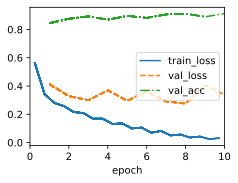

In [ ]:
model = ResNet18(lr=0.01)
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
data = d2l.FashionMNIST(batch_size=128, resize=(96, 96))
model.apply_init([next(iter(data.get_dataloader(True)))[0]], d2l.init_cnn)
trainer.fit(model, data)

**ResNeXt**

In [ ]:
class ResNeXtBlock(nn.Module):
    """The ResNeXt block."""
    def __init__(self, num_channels, groups, bot_mul, use_1x1conv=False,
                 strides=1):
        super().__init__()
        bot_channels = int(round(num_channels * bot_mul))
        self.conv1 = nn.LazyConv2d(bot_channels, kernel_size=1, stride=1)
        self.conv2 = nn.LazyConv2d(bot_channels, kernel_size=3,
                                   stride=strides, padding=1,
                                   groups=bot_channels//groups)
        self.conv3 = nn.LazyConv2d(num_channels, kernel_size=1, stride=1)
        self.bn1 = nn.LazyBatchNorm2d()
        self.bn2 = nn.LazyBatchNorm2d()
        self.bn3 = nn.LazyBatchNorm2d()
        if use_1x1conv:
            self.conv4 = nn.LazyConv2d(num_channels, kernel_size=1,
                                       stride=strides)
            self.bn4 = nn.LazyBatchNorm2d()
        else:
            self.conv4 = None

    def forward(self, X):
        Y = F.relu(self.bn1(self.conv1(X)))
        Y = F.relu(self.bn2(self.conv2(Y)))
        Y = self.bn3(self.conv3(Y))
        if self.conv4:
            X = self.bn4(self.conv4(X))
        return F.relu(Y + X)

In [ ]:
blk = ResNeXtBlock(32, 16, 1)
X = torch.randn(4, 32, 96, 96)
blk(X).shape

torch.Size([4, 32, 96, 96])

**Exercises**

1. What are the major differences between the Inception block in :numref:`fig_inception` and the residual block? How do they compare in terms of computation, accuracy, and the classes of functions they can describe?
1. Refer to Table 1 in the ResNet paper :cite:`He.Zhang.Ren.ea.2016` to implement different variants of the network.
1. For deeper networks, ResNet introduces a "bottleneck" architecture to reduce model complexity. Try to implement it.
1. In subsequent versions of ResNet, the authors changed the "convolution, batch normalization, and activation" structure to the "batch normalization, activation, and convolution" structure. Make this improvement yourself. See Figure 1 in :citet:`He.Zhang.Ren.ea.2016*1` for details.
1. Why can't we just increase the complexity of functions without bound, even if the function classes are nested?


**Answers**


1. Major Differences Between Inception Block and Residual Block
Inception Block:

  - Structure: Comprises multiple parallel convolutional paths (1x1, 3x3, 5x5, and pooling) that capture features at different scales simultaneously.
  - Computation: Generally more computationally intensive due to multiple convolutions being executed in parallel.
  - Functions Described: It can describe a wide range of functions due to its multi-path structure, allowing it to learn complex representations by combining features from different kernel sizes.
Residual Block:

   - Structure: Involves a shortcut connection that skips one or more layers, allowing the input to bypass some transformations. Typically consists of a sequence of convolutions followed by an addition of the original input.
   - Computation: More straightforward in terms of computation because it primarily focuses on learning residual mappings rather than learning the full mapping directly.
  - Functions Described: Residual blocks can approximate identity functions, making it easier for deeper networks to learn by mitigating the vanishing gradient problem.

Comparison:

  - Computation: Inception blocks are generally more computationally expensive due to their multi-path structure, while residual blocks tend to be simpler and more efficient.
  - Accuracy: Both blocks can achieve high accuracy, but they do so in different ways. Residual blocks tend to perform better in very deep networks due to their ability to ease training.
  - Function Complexity: Inception blocks can capture more complex relationships due to their diverse paths, while residual blocks focus on learning changes or residuals, which can also be very powerful, especially in deep networks.
  
2. Implementing Different Variants of ResNet
Refer to Table 1 in the ResNet paper (He et al., 2016) to understand the different configurations (e.g., ResNet-50, ResNet-101). Implementing these variants involves adjusting the number of layers and the bottleneck structure based on the depth specified in the table.

3. Implementing the Bottleneck Architecture

  Use a structure that consists of three convolutions: a 1x1 convolution to reduce dimensionality, followed by a 3x3 convolution, and finally another 1x1 convolution to restore dimensionality.
  This design reduces model complexity and improves computational efficiency while maintaining the depth of the network.
4. Changing the Convolution Structure
In subsequent versions of ResNet, the authors changed the order of operations to “batch normalization, activation, and convolution”:

  Implement this change by first applying batch normalization to the input, then applying the activation function, and finally applying the convolution operation.
This modification can help stabilize training and improve convergence rates.
5. Why Can't We Just Increase the Complexity of Functions Without Bound?
Increasing the complexity of functions without bound can lead to several issues:

  - Overfitting: More complex models can fit noise in the training data rather than the underlying distribution, leading to poor generalization on unseen data.
  - Computational Cost: Higher complexity requires more computational resources, which can be infeasible for larger datasets or real-time applications.
  - Optimization Difficulties: Very complex functions can create challenging landscapes for optimization algorithms, leading to difficulties in convergence.
  - Diminishing Returns: Beyond a certain point, adding complexity may yield minimal improvements in performance, while significantly increasing the risk of overfitting.

# **Densely Connected Networks (DenseNet)**

**Dense Blocks**

In [ ]:
def conv_block(num_channels):
    return nn.Sequential(
        nn.LazyBatchNorm2d(), nn.ReLU(),
        nn.LazyConv2d(num_channels, kernel_size=3, padding=1))

In [ ]:
class DenseBlock(nn.Module):
    def __init__(self, num_convs, num_channels):
        super(DenseBlock, self).__init__()
        layer = []
        for i in range(num_convs):
            layer.append(conv_block(num_channels))
        self.net = nn.Sequential(*layer)

    def forward(self, X):
        for blk in self.net:
            Y = blk(X)
            # Concatenate input and output of each block along the channels
            X = torch.cat((X, Y), dim=1)
        return X

In [ ]:
blk = DenseBlock(2, 10)
X = torch.randn(4, 3, 8, 8)
Y = blk(X)
Y.shape

torch.Size([4, 23, 8, 8])

**Transition Layers**

In [ ]:
def transition_block(num_channels):
    return nn.Sequential(
        nn.LazyBatchNorm2d(), nn.ReLU(),
        nn.LazyConv2d(num_channels, kernel_size=1),
        nn.AvgPool2d(kernel_size=2, stride=2))

In [ ]:
blk = transition_block(10)
blk(Y).shape

torch.Size([4, 10, 4, 4])

**DenseNet Model**

In [ ]:
class DenseNet(d2l.Classifier):
    def b1(self):
        return nn.Sequential(
            nn.LazyConv2d(64, kernel_size=7, stride=2, padding=3),
            nn.LazyBatchNorm2d(), nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

In [ ]:
@d2l.add_to_class(DenseNet)
def __init__(self, num_channels=64, growth_rate=32, arch=(4, 4, 4, 4),
             lr=0.1, num_classes=10):
    super(DenseNet, self).__init__()
    self.save_hyperparameters()
    self.net = nn.Sequential(self.b1())
    for i, num_convs in enumerate(arch):
        self.net.add_module(f'dense_blk{i+1}', DenseBlock(num_convs,
                                                          growth_rate))
        # The number of output channels in the previous dense block
        num_channels += num_convs * growth_rate
        # A transition layer that halves the number of channels is added
        # between the dense blocks
        if i != len(arch) - 1:
            num_channels //= 2
            self.net.add_module(f'tran_blk{i+1}', transition_block(
                num_channels))
    self.net.add_module('last', nn.Sequential(
        nn.LazyBatchNorm2d(), nn.ReLU(),
        nn.AdaptiveAvgPool2d((1, 1)), nn.Flatten(),
        nn.LazyLinear(num_classes)))
    self.net.apply(d2l.init_cnn)

**Training**

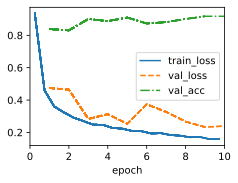

In [ ]:
model = DenseNet(lr=0.01)
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
data = d2l.FashionMNIST(batch_size=128, resize=(96, 96))
trainer.fit(model, data)

**Exercises**

1. Why do we use average pooling rather than max-pooling in the transition layer?
1. One of the advantages mentioned in the DenseNet paper is that its model parameters are smaller than those of ResNet. Why is this the case?
1. One problem for which DenseNet has been criticized is its high memory consumption.
    1. Is this really the case? Try to change the input shape to $224\times 224$ to compare the actual GPU memory consumption empirically.
    1. Can you think of an alternative means of reducing the memory consumption? How would you need to change the framework?
1. Implement the various DenseNet versions presented in Table 1 of the DenseNet paper :cite:`Huang.Liu.Van-Der-Maaten.ea.2017`.
1. Design an MLP-based model by applying the DenseNet idea. Apply it to the housing price prediction task in :numref:`sec_kaggle_house`.

**Answers**



1.
Average pooling is often preferred in transition layers of networks like DenseNet for several reasons:

  - Feature Preservation: Average pooling captures more information about the features since it considers the average value rather than just the maximum. This helps in retaining more context and reducing the loss of information.
  - Reducing Variance: Average pooling can help smooth the feature maps, reducing sensitivity to noise and small variations in the input, which may be beneficial in the context of feature reuse in DenseNet.
  - Gradient Flow: In DenseNet, where connections between layers are dense, using average pooling can support better gradient flow by providing a more stable representation of the features.

2.
DenseNet typically has smaller model parameters than ResNet due to its architecture:

  - Feature Reuse: DenseNet encourages feature reuse by connecting each layer to every subsequent layer. This means that instead of learning redundant features across multiple layers, DenseNet can use features from earlier layers, effectively reducing the number of parameters needed to achieve similar representational power.
  - Bottleneck Layers: DenseNet uses bottleneck layers (1x1 convolutions) to reduce the number of feature maps before applying heavier operations like 3x3 convolutions. This reduces the overall number of parameters while still allowing for deep representations.
3. High Memory Consumption in DenseNet
DenseNet has been criticized for high memory consumption because:

  - Storage of Activations: Since every layer receives inputs from all preceding layers, the memory required to store activations increases significantly with depth. Each layer's activations must be retained for backpropagation.
  - Increased Connectivity: The dense connections mean that the number of activations stored grows rapidly with each layer, leading to increased memory usage.
  - To empirically compare GPU memory consumption, you can experiment by changing the input shape and monitoring memory usage during training or inference. Tools like TensorFlow Profiler or PyTorch’s memory tracking can be helpful for this.

* Alternative Means of Reducing Memory Consumption
To reduce memory consumption in DenseNet, consider the following strategies:

  - Gradient Checkpointing: This technique involves saving only a subset of activations during the forward pass and recomputing others during the backward pass, which can significantly reduce memory usage at the cost of additional computation.
  - Reducing Depth/Width: You can experiment with fewer layers or fewer filters in the convolutional layers to reduce memory usage.
  - Using Mixed Precision Training: Utilizing lower precision (like FP16) can reduce memory consumption while speeding up training on compatible hardware.
  - Changing the framework may involve adding support for gradient checkpointing and ensuring that your network architecture is compatible with mixed precision.

4. Implementing Various DenseNet Versions
To implement different versions of DenseNet as presented in Table 1 of the DenseNet paper (Huang et al., 2017):

  - DenseNet-121, DenseNet-169, DenseNet-201: These versions differ primarily in the number of layers and the number of filters used in the dense blocks. You can follow the architecture details provided in the paper to construct these networks, focusing on the number of layers and growth rate specified for each variant.

5. Designing an MLP-based Model Using the DenseNet Idea
To apply the DenseNet concept to an MLP for the housing price prediction task:

  Architecture Design:

  - Use dense layers where each layer receives input from all previous layers (similar to DenseNet).
  - Implement bottleneck structures (smaller layers before the main layer) to keep the parameter count low.
  - Include skip connections that combine features from earlier layers.

  Implementation:

  - Train the model on your dataset, using techniques like dropout or batch normalization as needed to improve performance.

  Training and Evaluation:

  - Use metrics suitable for regression tasks (like Mean Squared Error) to evaluate the model’s performance on housing price predictions.

# **Designing Convolution Network Architectures**

In [ ]:
import torch
from torch import nn
from torch.nn import functional as F
from d2l import torch as d2l

**The AnyNet Design Space**

In [ ]:
class AnyNet(d2l.Classifier):
    def stem(self, num_channels):
        return nn.Sequential(
            nn.LazyConv2d(num_channels, kernel_size=3, stride=2, padding=1),
            nn.LazyBatchNorm2d(), nn.ReLU())

In [ ]:
@d2l.add_to_class(AnyNet)
def stage(self, depth, num_channels, groups, bot_mul):
    blk = []
    for i in range(depth):
        if i == 0:
            blk.append(d2l.ResNeXtBlock(num_channels, groups, bot_mul,
                use_1x1conv=True, strides=2))
        else:
            blk.append(d2l.ResNeXtBlock(num_channels, groups, bot_mul))
    return nn.Sequential(*blk)

In [ ]:
@d2l.add_to_class(AnyNet)
def __init__(self, arch, stem_channels, lr=0.1, num_classes=10):
    super(AnyNet, self).__init__()
    self.save_hyperparameters()
    self.net = nn.Sequential(self.stem(stem_channels))
    for i, s in enumerate(arch):
        self.net.add_module(f'stage{i+1}', self.stage(*s))
    self.net.add_module('head', nn.Sequential(
        nn.AdaptiveAvgPool2d((1, 1)), nn.Flatten(),
        nn.LazyLinear(num_classes)))
    self.net.apply(d2l.init_cnn)

**RegNet**

In [ ]:
class RegNetX32(AnyNet):
    def __init__(self, lr=0.1, num_classes=10):
        stem_channels, groups, bot_mul = 32, 16, 1
        depths, channels = (4, 6), (32, 80)
        super().__init__(
            ((depths[0], channels[0], groups, bot_mul),
             (depths[1], channels[1], groups, bot_mul)),
            stem_channels, lr, num_classes)

In [ ]:
RegNetX32().layer_summary((1, 1, 96, 96))

Sequential output shape:	 torch.Size([1, 32, 48, 48])
Sequential output shape:	 torch.Size([1, 32, 24, 24])
Sequential output shape:	 torch.Size([1, 80, 12, 12])
Sequential output shape:	 torch.Size([1, 10])


**Training**

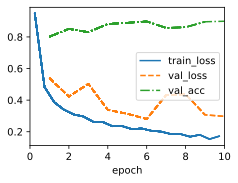

In [ ]:
model = RegNetX32(lr=0.05)
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
data = d2l.FashionMNIST(batch_size=128, resize=(96, 96))
trainer.fit(model, data)

**Exercises**

1. Increase the number of stages to four. Can you design a deeper RegNetX that performs better?
1. De-ResNeXt-ify RegNets by replacing the ResNeXt block with the ResNet block. How does your new model perform?
1. Implement multiple instances of a "VioNet" family by *violating* the design principles of RegNetX. How do they perform? Which of ($d_i$, $c_i$, $g_i$, $b_i$) is the most important factor?
1. Your goal is to design the "perfect" MLP. Can you use the design principles introduced above to find good architectures? Is it possible to extrapolate from small to large networks?

**Answers**



1. Designing a Deeper RegNetX

To increase the number of stages to four and create a deeper RegNetX:

  - Architecture Design:

    - Use a modular design where each stage consists of several blocks (e.g., ResNeXt blocks).
    - Increase the depth by adding more blocks within each stage, while also increasing the width (number of channels) appropriately.
    - Consider using progressive downsampling in the pooling layers to maintain the spatial dimensions.
  - Design Principles:

    - Follow RegNet’s principles such as scaling (di, ci, gi, bi) to ensure efficient growth of the network.
    - Experiment with different configurations for each stage, possibly by varying the width and depth based on performance on a validation set.
  - Performance Evaluation:

    - Train and evaluate your model on a standard dataset (e.g., ImageNet) to compare its performance against existing RegNet models.

2. De-ResNeXt-ify RegNets

To replace the ResNeXt block with the ResNet block in RegNet:

  - Implementation:
    
    Modify the RegNet architecture to use traditional ResNet blocks instead of ResNeXt blocks. This involves removing the grouped convolutions and the cardinality parameter, reverting to standard convolutions.
  - Performance:

  Train the modified network and evaluate its performance. Generally, you might see a reduction in performance compared to the original RegNetX, as ResNeXt’s ability to model diverse features through cardinality is beneficial.

3. Implementing the VioNet Family

For the VioNet family, you’ll want to deliberately violate the design principles of RegNetX:

  - Design Variations:
  Experiment with configurations that do not follow the scaling rules for di, ci, gi, and bi. For instance, you could set inconsistent growth rates across stages or drastically vary the channel sizes in each block.
  - Performance Evaluation:
  After implementing these variations, train the networks and compare their performance. Monitor metrics like accuracy and loss.
  - Most Important Factor:
  Through experimentation, you may determine which parameter (di, ci, gi, bi) impacts performance the most. Often, it’s the channel width (ci) that significantly influences the capacity and performance of the network, but this can depend on the specific architecture and task.

4. Designing the “Perfect” MLP

Using design principles from RegNet to find good MLP architectures:

  - Design Principles:

    - Apply the concepts of scaling and complexity from RegNet to MLPs. For instance, you can incrementally increase the number of neurons in hidden layers while ensuring proper depth and width ratios.
    - Use activation functions that maintain gradient flow, such as ReLU or its variants, and consider dropout for regularization.
  - Extrapolation from Small to Large Networks:

    - Start with a smaller model and gradually scale it up while monitoring performance. You can use techniques like neural architecture search (NAS) to identify optimal configurations.
    - Evaluate the small model on your dataset and use insights from its performance to inform the design of larger models.